In [65]:
import subprocess
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import seaborn as sns

## Generate Tests

In [ ]:
for n in range(1000, n_max, 1000):
    try:
        out = subprocess.check_output(["./src/program2.out", f'{n}', '0'])
    except subprocess.CalledProcessError as e:
        print(e.output)
        break
    else: 
        with open(csv_file, 'a') as f:
            f.write(f'{n}, {float(out)}\n')

In [75]:
threads = [1, 2, 4, 8, 16]
strong = {
    '#threads': [], 
    'Total runtime': [],
    'Iteration': []
}
for i in range(0, 3):
    for t in threads:
        result = subprocess.check_output(["./programs/jacobi_opt_mp.out", '-n', '2000', '-t', f'{t}'])
        time = float(str(result).split('Total runtime  = ')[1].split(' seconds')[0])
        strong['Total runtime'].append(time)
        strong['Iteration'].append(i)
        strong['#threads'].append(t)
        print('Threads', t)
        print('Iteration', i)

Threads 1
Iteration 0
Threads 2
Iteration 0
Threads 4
Iteration 0
Threads 8
Iteration 0
Threads 16
Iteration 0
Threads 1
Iteration 1
Threads 2
Iteration 1
Threads 4
Iteration 1
Threads 8
Iteration 1
Threads 16
Iteration 1
Threads 1
Iteration 2
Threads 2
Iteration 2
Threads 4
Iteration 2
Threads 8
Iteration 2
Threads 16
Iteration 2


In [76]:
strong_scalability = pd.DataFrame(strong)
strong_scalability.to_csv('strong_scalability.csv')

In [79]:
threads = [1, 2, 4, 8, 16]
ns = [1000, 2000, 4000, 8000, 16000]
weak = {
    '#threads': [], 
    'ns': [],
    'Total runtime': [],
    'Iteration': []
}
for i in range(0, 3):
    for j in range(len(threads)):
        result = subprocess.check_output(["./programs/jacobi_opt_mp.out", '-n', f'{ns[j]}', '-t', f'{threads[j]}'])
        time = float(str(result).split('Total runtime  = ')[1].split(' seconds')[0])
        weak['Total runtime'].append(time)
        weak['Iteration'].append(i)
        weak['#threads'].append(threads[j])
        weak['ns'].append(ns[j])
        print('Iteration ', i)
        print('threads ', threads[j])
        print('nw ', ns[j])



Iteration  0
threads  1
nw  1000
Iteration  0
threads  2
nw  2000
Iteration  0
threads  4
nw  4000
Iteration  0
threads  8
nw  8000
Iteration  0
threads  16
nw  16000
Iteration  1
threads  1
nw  1000
Iteration  1
threads  2
nw  2000
Iteration  1
threads  4
nw  4000
Iteration  1
threads  8
nw  8000
Iteration  1
threads  16
nw  16000
Iteration  2
threads  1
nw  1000
Iteration  2
threads  2
nw  2000
Iteration  2
threads  4
nw  4000
Iteration  2
threads  8
nw  8000
Iteration  2
threads  16
nw  16000


In [82]:
weak_scalability = pd.DataFrame(weak)
weak_scalability.to_csv('weak_scalability.csv')

## Analyse Results

[Text(0.5, 0, 'Número de Threads'),
 Text(0, 0.5, 'Total Runtime (segundos)'),
 Text(0.5, 1.0, 'Escalabilidade Forte'),

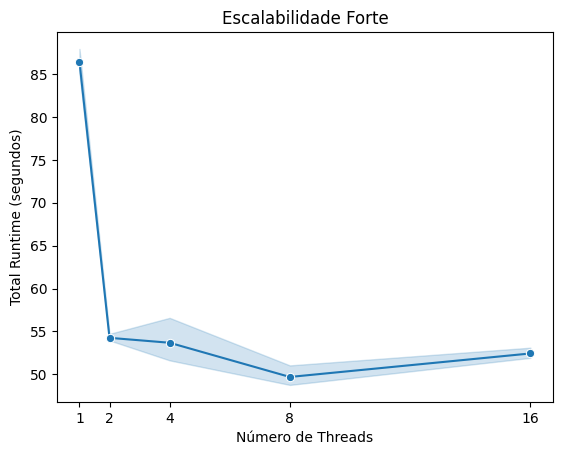

In [89]:
ax = sns.lineplot(data=strong_scalability, x='#threads', y='Total runtime', marker='o')
ax.set(
    xlabel ="Número de Threads",
    ylabel = "Total Runtime (segundos)", 
    title ='Escalabilidade Forte',
    xticks=strong_scalability['#threads'].unique()
)


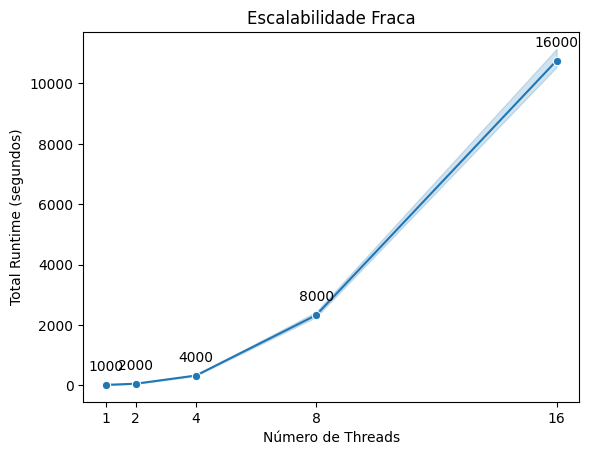

In [130]:
threads = [1, 2, 4, 8, 16]
ns = [1000, 2000, 4000, 8000, 16000]
mean_time = weak_scalability.groupby(by='#threads')['Total runtime'].mean().values
fig, ax = pyplot.subplots(figsize=a4_dims)

sns.lineplot(ax=ax, data=weak_scalability, x='#threads', y='Total runtime', marker='o')
ax.set(
    xlabel ="Número de Threads",
    ylabel = "Total Runtime (segundos)", 
    title ='Escalabilidade Fraca',
    xticks=threads
)

for t, y, n in zip(threads,mean_time, ns):
    plt.annotate(f'{n}', (t,y), textcoords="offset points",  xytext=(0,10), ha='center') # 


In [92]:
weak_scalability


,#threads,ns,Total runtime,Iteration
0,1,1000,12.658204,0
1,2,2000,56.291755,0
2,4,4000,342.249159,0
3,8,8000,2430.636442,0
4,16,16000,11144.812873,0
5,1,1000,14.564324,1
6,2,2000,51.614061,1
7,4,4000,316.816976,1
8,8,8000,2280.681544,1
9,16,16000,10585.671552,1
